<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #87CEEB; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">🐱🐶🚀 Unleashing the Power of Deep Learning: The Ultimate Cat 🐱 and Dog 🐶 Classifier! 🏆🔥!</h1>
</div>


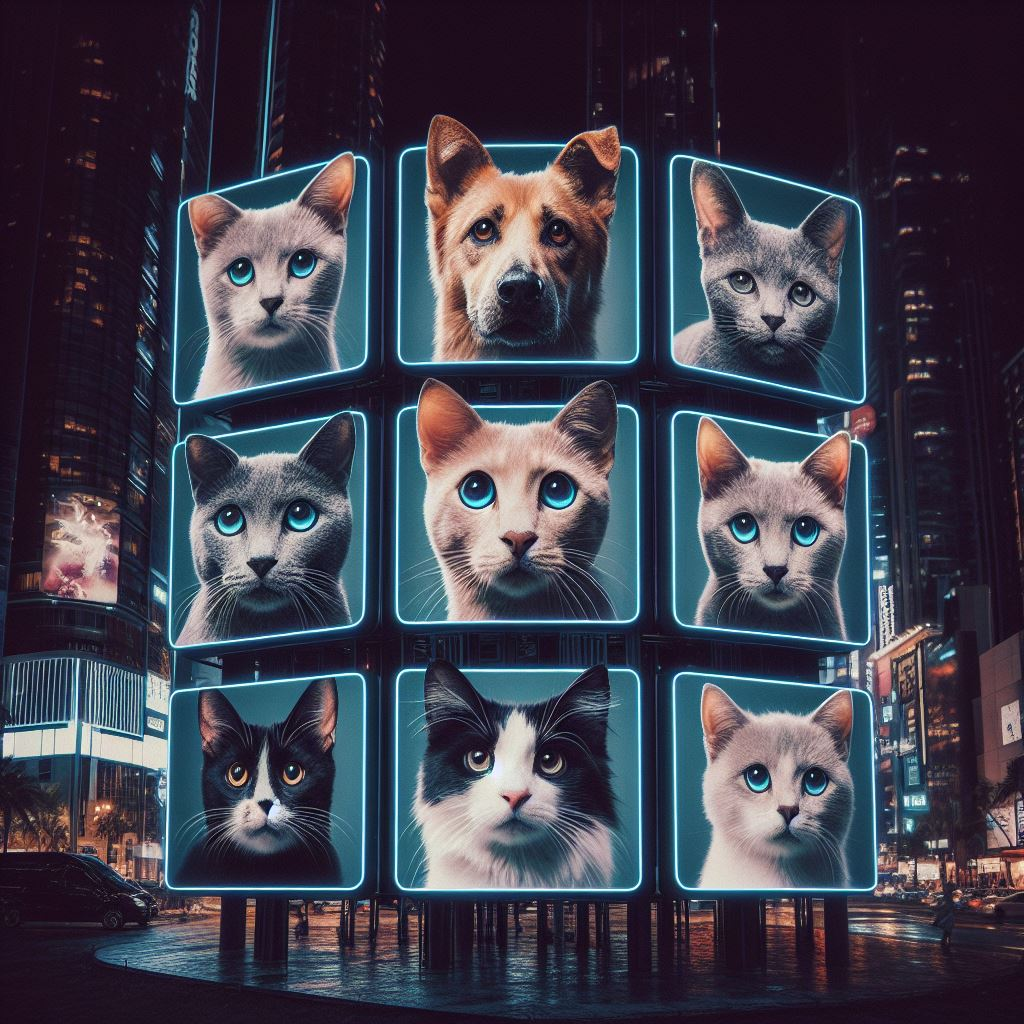

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #87CEEB; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">🐱🐶🚀 Importing the Libraries 🔥!</h1>
</div>


In [24]:
# importing the important libraries 
import pandas as pd 
import warnings
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
warnings.filterwarnings("ignore")

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #87CEEB; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">🐱🐶🚀Loading the Dataset 🔥!</h1>
</div>


In [48]:

import tensorflow as tf
from tensorflow.keras import layers

# Set seed for reproducibility
seed = 123

# Define the directory paths for the training and validation datasets
train_dir = '/kaggle/input/dogs-vs-cats/train'
validation_dir = '/kaggle/input/dogs-vs-cats/test'

# Use the image_dataset_from_directory function to create training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    labels="inferred",
    label_mode="categorical",  # Use "categorical" for categorical labels
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="training",
    seed=seed
)

# Use the image_dataset_from_directory function to create validation dataset
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory=validation_dir,
    labels="inferred",
    label_mode="categorical",  # Use "categorical" for categorical labels
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="validation",
    seed=seed
)


Found 20000 files belonging to 2 classes.
Using 16000 files for training.
Found 5000 files belonging to 2 classes.
Using 1000 files for validation.


<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #87CEEB; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">🐱🐶🚀 Visualizing the data🔥!</h1>
</div>


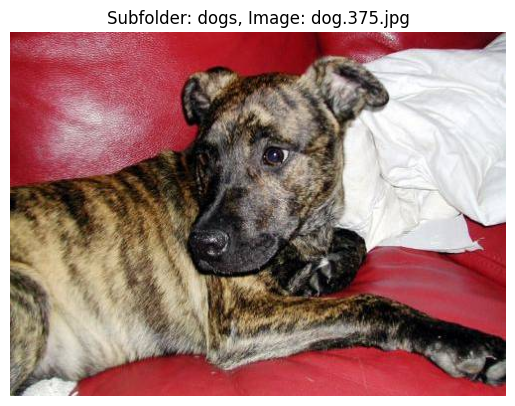

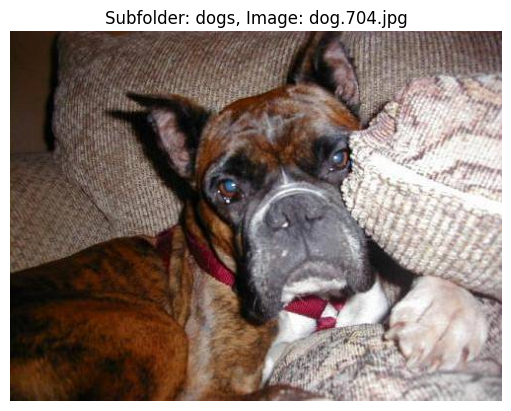

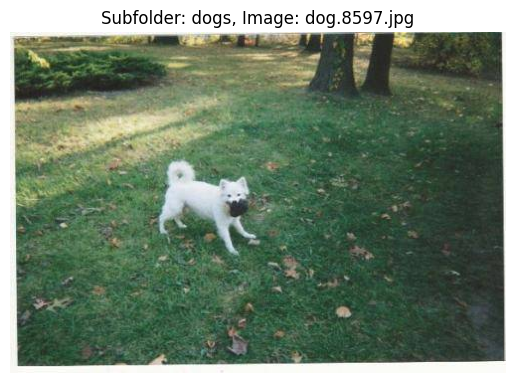

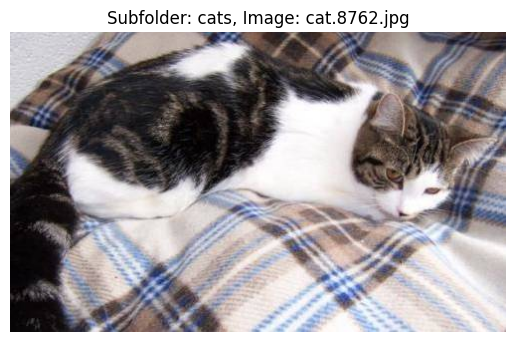

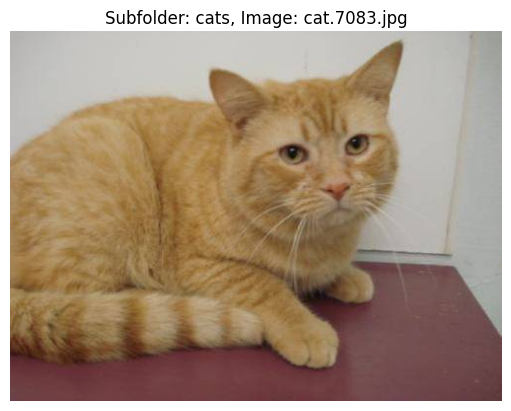

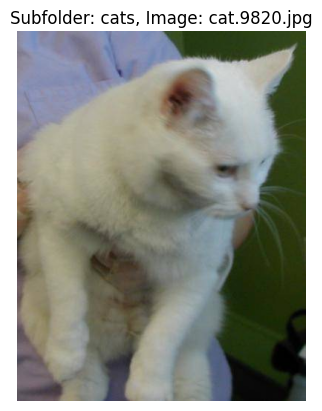

In [59]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the main folder
main_folder = '/kaggle/input/dogs-vs-cats/test'

# Display images from each subfolder
for subfolder in os.listdir(main_folder):
    subfolder_path = os.path.join(main_folder, subfolder)
    if os.path.isdir(subfolder_path):
        # Display images from the subfolder
        for image_file in os.listdir(subfolder_path)[:3]:
            image_path = os.path.join(subfolder_path, image_file)
            image = mpimg.imread(image_path)
            plt.imshow(image)
            plt.title(f'Subfolder: {subfolder}, Image: {image_file}')
            plt.axis('off')
            plt.show()


<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #87CEEB; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">🐱🐶🚀 Data Normalization🔥!</h1>
</div>


In [26]:
# Normalizing the data 
def process(image,label):
    image = tf.cast(image/255,tf.float32)
    return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [27]:
import os

# Get the directory path from the DirectoryIterator object
dataset_path = '/kaggle/input/dogs-vs-cats/train'

# Count the number of subdirectories (classes)
num_classes = len([name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))])

print("Number of classes:", num_classes)

Number of classes: 2


<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #87CEEB; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">🐱🐶🚀 Using the power of pre-trained models 🔥!</h1>
</div>


In [28]:
from tensorflow.keras.applications import VGG16 ,Xception

conv_base = Xception(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3),
    pooling='avg'
)

In [29]:
conv_base.trainable = False


In [30]:
model = Sequential()
model.add(conv_base)
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(Dense(120, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #87CEEB; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">🐱🐶🚀 Compiling the model🔥!</h1>
</div>


In [31]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [32]:
from tensorflow.keras.callbacks import EarlyStopping

history = model.fit(train_ds, epochs=100, validation_data=validation_ds,callbacks=[EarlyStopping(patience=0)])


Epoch 1/100
500/500 [==============================] - 58s 107ms/step - loss: 0.0441 - accuracy: 0.9851 - val_loss: 0.0408 - val_accuracy: 0.9870
Epoch 2/100
500/500 [==============================] - 53s 105ms/step - loss: 0.0263 - accuracy: 0.9911 - val_loss: 0.0371 - val_accuracy: 0.9850
Epoch 3/100
500/500 [==============================] - 53s 106ms/step - loss: 0.0204 - accuracy: 0.9927 - val_loss: 0.0508 - val_accuracy: 0.9890


<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #87CEEB; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">🐱🐶🚀Evaluating the model 🔥!</h1>
</div>


In [33]:
# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = model.evaluate(validation_ds)

# Print the validation loss and accuracy
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

32/32 [==============================] - 3s 95ms/step - loss: 0.0508 - accuracy: 0.9890
Validation Loss: 0.050788361579179764
Validation Accuracy: 0.9890000224113464


> If you find this notebook helpful, please consider giving it an upvote! Your support means a lot. Thank you!

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #87CEEB; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;"> THE END :)🔥!</h1>
</div>
